                        Age    Salary  Performance_Score  Years_At_Company
Age                1.000000 -0.010024           0.002532          0.015559
Salary            -0.010024  1.000000          -0.014363         -0.007053
Performance_Score  0.002532 -0.014363           1.000000          0.009569
Years_At_Company   0.015559 -0.007053           0.009569          1.000000


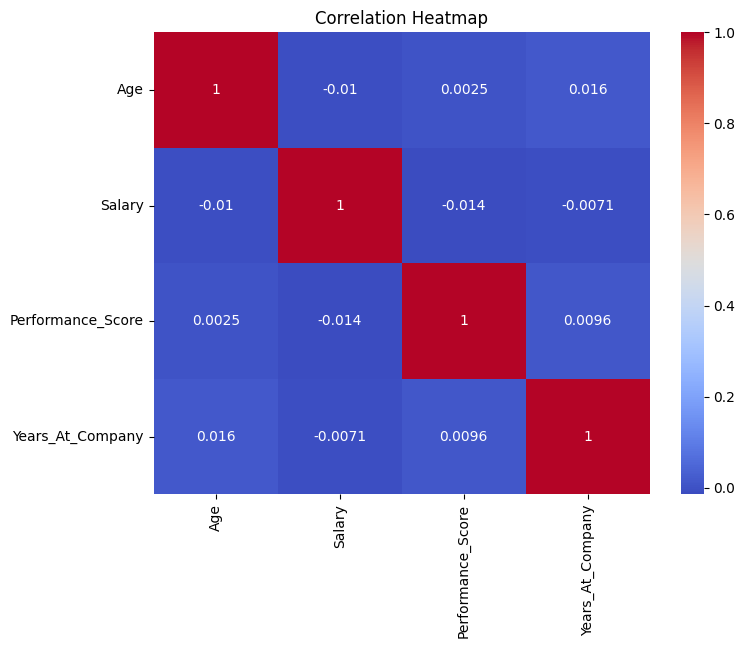

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read your CSV
df = pd.read_csv("large_employee_data.csv")

# Only numeric columns
corr_matrix = df.corr(numeric_only=True)

print(corr_matrix)  # Raw correlation values

# Visualize with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


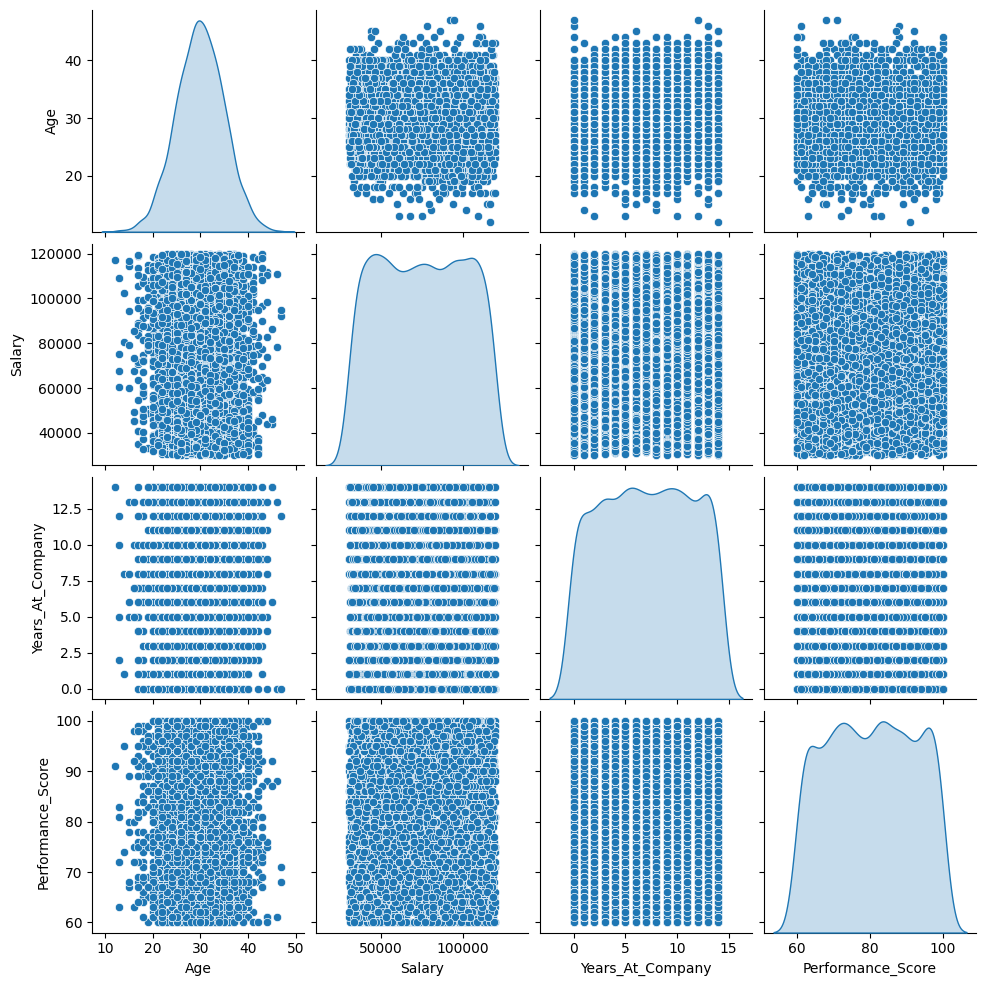

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for selected numeric columns
sns.pairplot(df[["Age", "Salary", "Years_At_Company", "Performance_Score"]], diag_kind="kde")
plt.show()


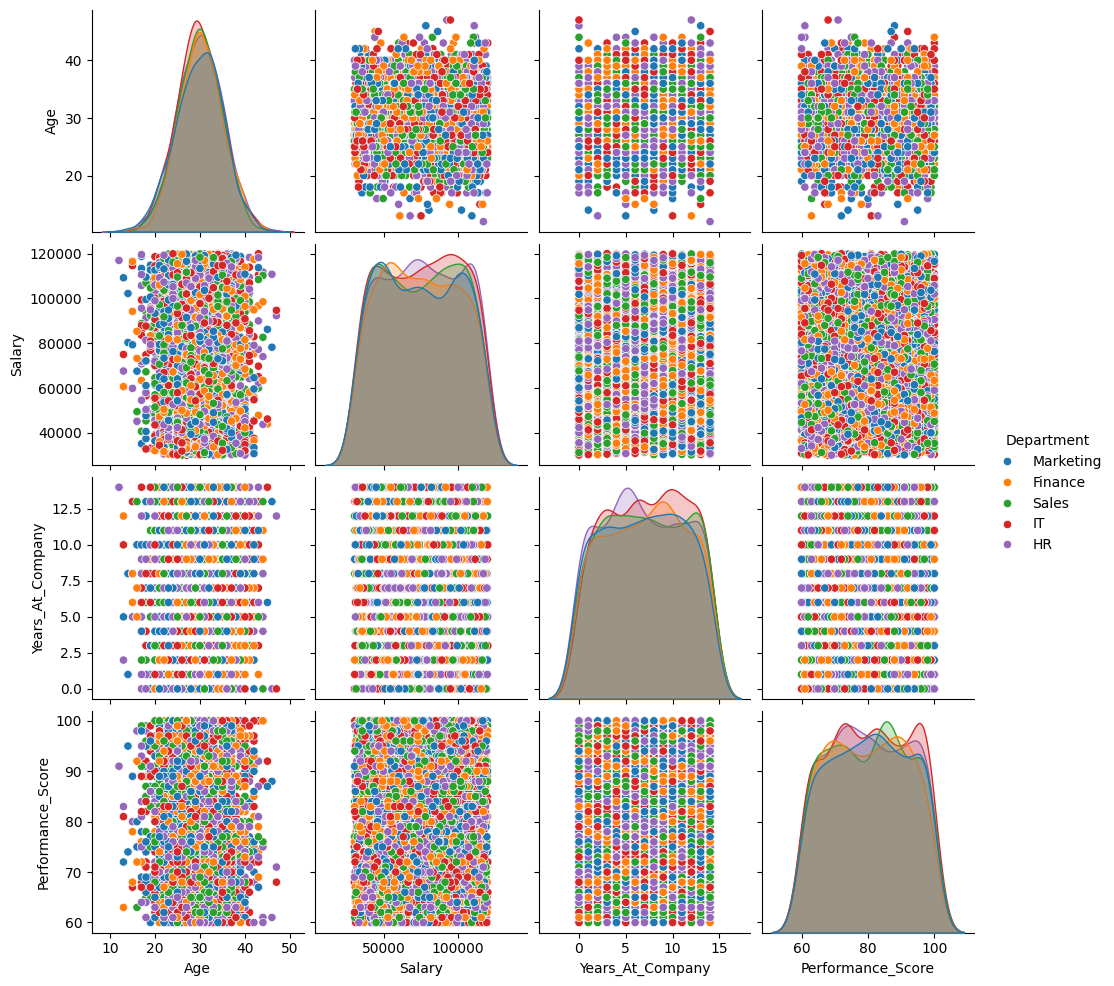

In [3]:
sns.pairplot(df[["Age", "Salary", "Years_At_Company", "Performance_Score", "Department"]], 
             hue="Department", diag_kind="kde")
plt.show()


In [4]:
df = pd.read_csv("realistic_employee_data.csv")
print(df)

    Employee_ID  Age  Years_At_Company  Salary  Performance_Score Department  \
0             1   50                14   79243                 94      Sales   
1             2   36                 9   59046                 81         HR   
2             3   29                 7   49486                 84    Finance   
3             4   42                12   68338                 76    Finance   
4             5   40                 9   63911                 68         HR   
..          ...  ...               ...     ...                ...        ...   
95           96   58                20   90757                 94      Sales   
96           97   56                20   94434                100         HR   
97           98   43                12   61060                 96  Marketing   
98           99   48                16   88711                 90    Finance   
99          100   56                20   83420                100      Sales   

    Bonus  
0    7448  
1    4782  
2  

In [5]:
df.head()

,Employee_ID,Age,Years_At_Company,Salary,Performance_Score,Department,Bonus
0,1,50,14,79243,94,Sales,7448
1,2,36,9,59046,81,HR,4782
2,3,29,7,49486,84,Finance,4156
3,4,42,12,68338,76,Finance,5193
4,5,40,9,63911,68,HR,4345


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employee_ID        100 non-null    int64 
 1   Age                100 non-null    int64 
 2   Years_At_Company   100 non-null    int64 
 3   Salary             100 non-null    int64 
 4   Performance_Score  100 non-null    int64 
 5   Department         100 non-null    object
 6   Bonus              100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [7]:
df.describe()

,Employee_ID,Age,Years_At_Company,Salary,Performance_Score,Bonus
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,40.060000,10.680000,66891.740000,83.750000,5743.27000
std,29.011492,10.688255,5.465928,15874.398462,11.875937,1985.25333
min,1.000000,22.000000,0.000000,33654.000000,54.000000,2000.00000
25%,25.750000,30.000000,6.750000,54489.750000,75.750000,4001.00000
50%,50.500000,41.500000,11.000000,65953.500000,84.000000,5604.00000
75%,75.250000,48.000000,15.000000,80484.500000,94.250000,7241.75000
max,100.000000,59.000000,20.000000,97340.000000,100.000000,9734.00000


In [8]:
df.isnull()

,Employee_ID,Age,Years_At_Company,Salary,Performance_Score,Department,Bonus
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


In [12]:
df.groupby("Department")["Salary"].mean()

Department
Finance      62495.080000
HR           68752.058824
IT           66411.384615
Marketing    63532.666667
Sales        72262.074074
Name: Salary, dtype: float64

In [10]:
df.groupby("Department")["Performance_Score"].mean()

Department
Finance      80.240000
HR           82.470588
IT           86.076923
Marketing    82.000000
Sales        87.851852
Name: Performance_Score, dtype: float64

In [ ]:
bonus_mean = df.groupby("Department")["Bonus"].mean()
print(f"Department with max bonus {bonus_mean.max()} is {bonus_mean.idxmax()}")



Department with max bonus 6460.259259259259 is Sales


In [15]:
dept_avg = df.groupby("Department")['Bonus'].mean().reset_index()
top_row = dept_avg.loc[dept_avg["Bonus"].idxmax()]
print(top_row)

Department          Sales
Bonus         6460.259259
Name: 4, dtype: object


In [20]:
dept_avg = (
            df.groupby("Department",as_index=False).agg( {"Bonus":"mean"} ).sort_values("Bonus",ascending=False).head(1)
)
print(dept_avg)

  Department        Bonus
4      Sales  6460.259259


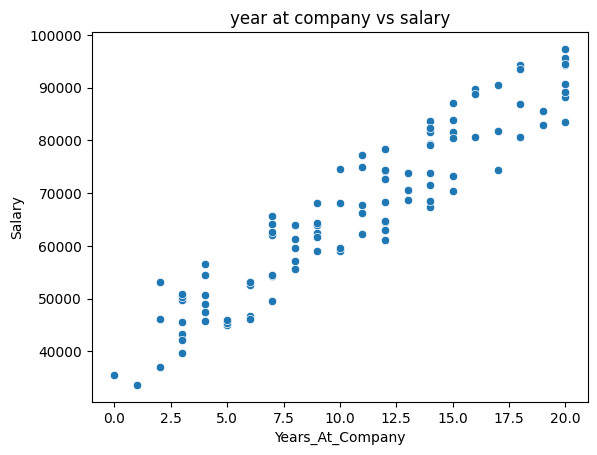

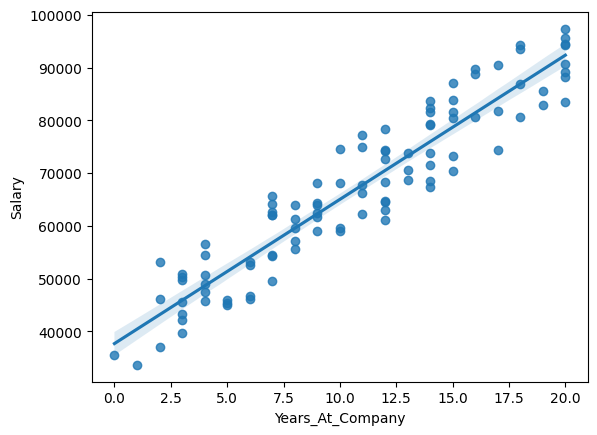

In [22]:
sns.scatterplot(data=df,x="Years_At_Company",y="Salary")
plt.title("year at company vs salary")
plt.show()

sns.regplot(data=df, x="Years_At_Company",y="Salary")
plt.show()

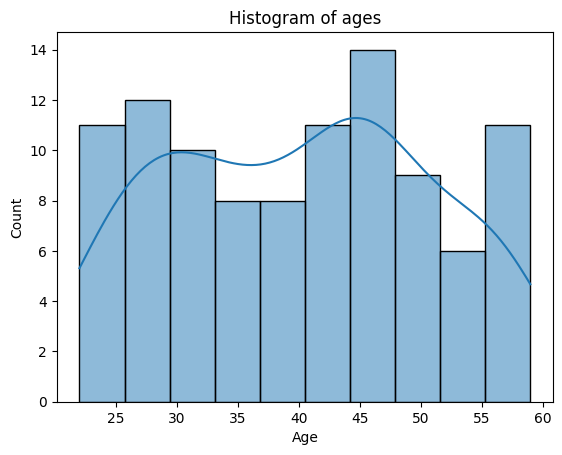

In [24]:
sns.histplot(data=df,x="Age",bins=10,kde=True)
plt.title("Histogram of ages")
plt.show()

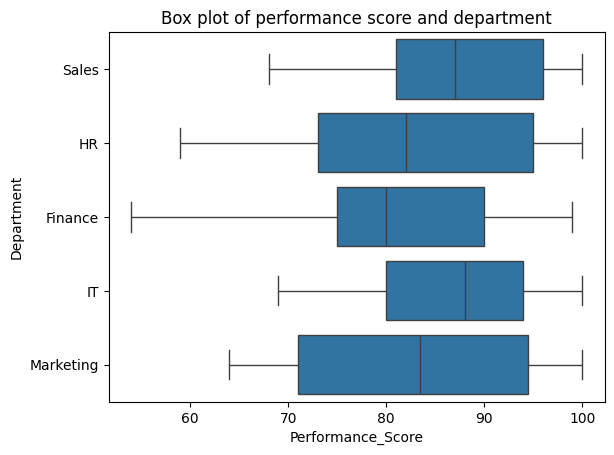

In [26]:
sns.boxplot(data=df,x="Performance_Score",y="Department")
plt.title("Box plot of performance score and department")
plt.show()

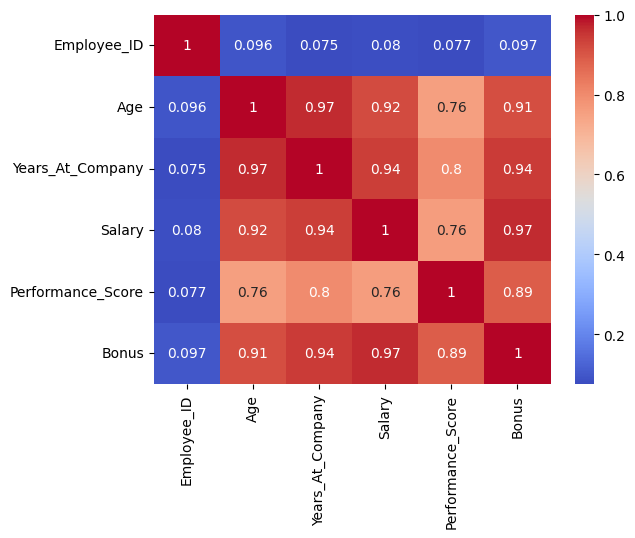

In [27]:
cor_mat = df.corr(numeric_only=True)

sns.heatmap(cor_mat,annot=True,cmap="coolwarm")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

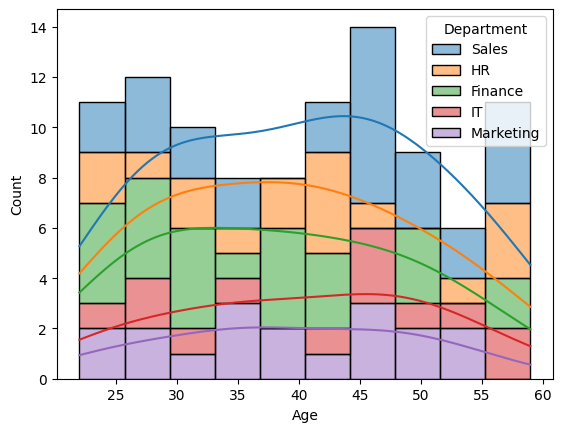

In [28]:
sns.histplot(data=df, x="Age", hue="Department", bins=10, kde=True, multiple="stack")


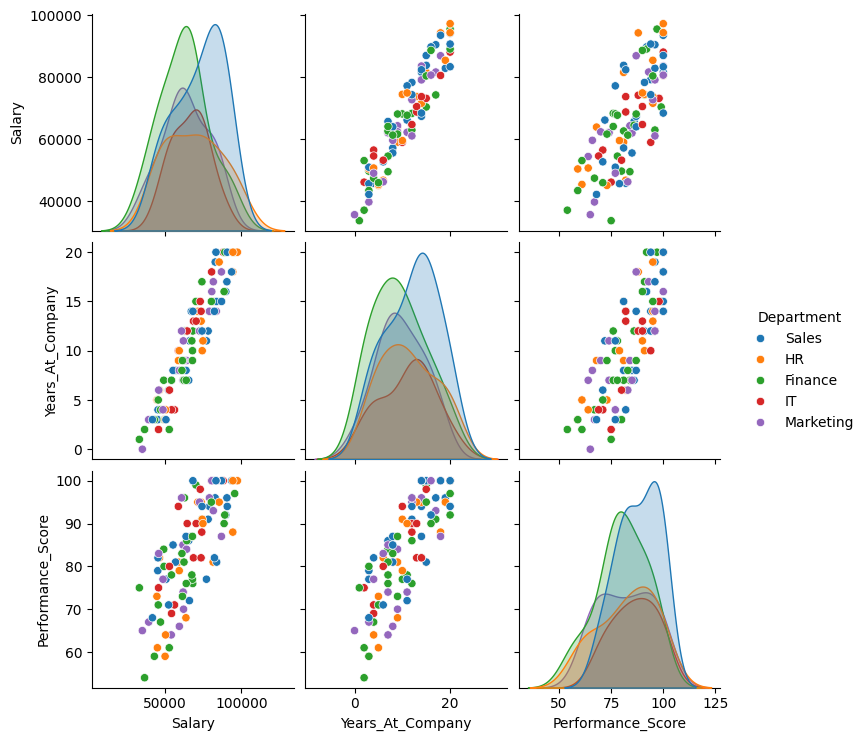

In [29]:
sns.pairplot(df, vars=["Salary","Years_At_Company","Performance_Score"], hue="Department")


<Axes: xlabel='Department', ylabel='Performance_Score'>

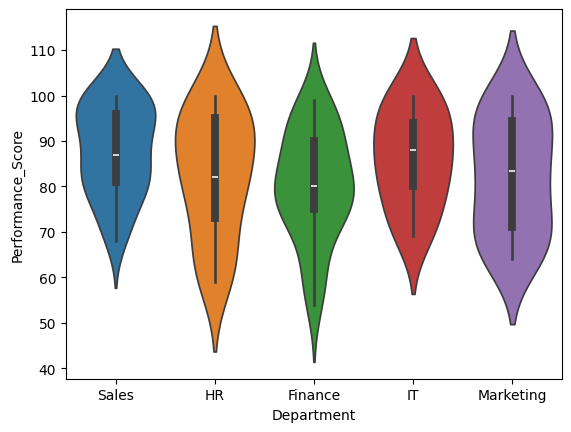

In [31]:
sns.violinplot(data=df, x="Department", y="Performance_Score",hue="Department")
